In [21]:
data_folder = r"Circles\train"
output_folder = r"CirclesA\train"

In [22]:
import os

from local_vars import root_folder

data_fullpath = os.path.join(root_folder, data_folder)

image_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('.png')]
annot_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('.csv')]
num_images = len(image_file_list)

print("Found {} image files".format(num_images))
print("Found {} annotation files".format(len(annot_file_list)))

Found 10000 image files
Found 1 annotation files


In [23]:
import pandas

annot_df = pandas.DataFrame()

for i in range(len(annot_file_list)):
    current_file_path = os.path.join(data_fullpath, annot_file_list[i])
    annot_df = pandas.concat([annot_df, pandas.read_csv(current_file_path)])
    
print("Number of annotations found: {}".format(annot_df.shape[0]))

Number of annotations found: 10000


In [24]:
import numpy as np

class_numbers = annot_df[['class']].values
num_classes = max(class_numbers)[0] + 1

print("{} classes found".format(num_classes))

class_data = np.zeros([num_images, num_classes])

2 classes found


In [25]:
import cv2

image_width = 512
image_height = 512
image_data = np.zeros([num_images, image_width, image_height]).astype(np.uint8)

for i in range(num_images):
    current_file_name = image_file_list[i]
    current_file_path = os.path.join(data_fullpath, current_file_name)
    image = cv2.imread(current_file_path, 0)
    if image is None:
        print("File not read: {}".format(current_file_path))
        break
    if image.shape[0] != image_width or image.shape[1] != image_height:
        image_data[i] = cv2.resize(image, (image_width, image_height)).astype(np.uint8)
    else:
        image_data[i] = image.astype(numpy.uint8)
    class_number = annot_df[annot_df.file_name==current_file_name]['class'].values[0]
    class_data[i,class_number] = 1

print(class_data[:5])    

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Showing image #4952 of 10000


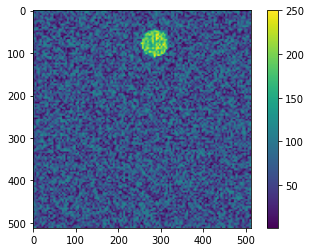

In [26]:
# Show an example positive image to make sure data is read properly.
# This cell is not necessary to generate output, but it's nice to check that the data looks good.

positive_indices = np.where(class_data[:,1]==1)
image_index = positive_indices[0][len(positive_indices[0]) // 2]
print("Showing image #{} of {}".format(image_index, num_images))

import matplotlib.pyplot as plt
plt.imshow(image_data[image_index, :, :])
plt.colorbar()
plt.show()

In [27]:
output_fullpath = os.path.join(root_folder, output_folder)

if not os.path.exists(output_fullpath):
    os.makedirs(output_fullpath)
    print("Created folder: " + output_fullpath)

images_output_file = os.path.join(output_fullpath, "images")
class_output_file = os.path.join(output_fullpath, "classes")

print("Saving images to:  {}".format(images_output_file))
print("Saving classes to: {}".format(class_output_file))

np.save(images_output_file, image_data)
np.save(class_output_file, class_data)

Created folder: m:\Temp\CirclesA\train
Saving images to:  m:\Temp\CirclesA\train\images
Saving classes to: m:\Temp\CirclesA\train\classes
